<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [2]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [3]:
# Find the shape
df.shape



(14999, 10)

In [4]:
# Display the top 5 rows.
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
df.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Find the null values
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

Number of employees who left the company: 3571


<AxesSubplot:>

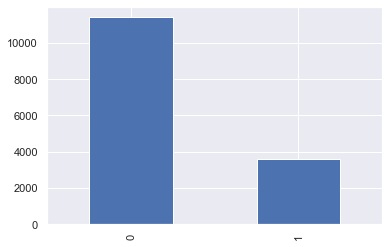

In [8]:
# Count of how many employees left the company
count_left = df['left'].sum()
print(f"Number of employees who left the company: {count_left}")
df['left'].value_counts().plot(kind='bar')


**Question:What can you interpret from the plot above?** 

Answer:  3571 employees have left the company. This suggests a significant attrition rate, which may warrant further investigation into factors influencing employee retention and strategies for improving employee satisfaction and engagement.

**Task 3: Find out the number of projects being handled.**

Number of projects being handled: 14999


<AxesSubplot:>

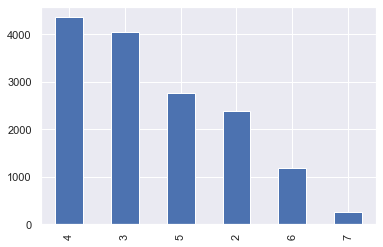

In [9]:
# Write code here
count_projects = df['number_project'].count()
print(f"Number of projects being handled: {count_projects}")
df['number_project'].value_counts().plot(kind='bar')


**Question: What insights can you infer from the above plot?**

Answer: The information indicates that there are a total of 14,999 projects being handled. The distribution and concentration of projects among employees could be assessed for workload balance, potential burnout, or efficiency. Understanding the project distribution can help optimize resource allocation and workload management strategies.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

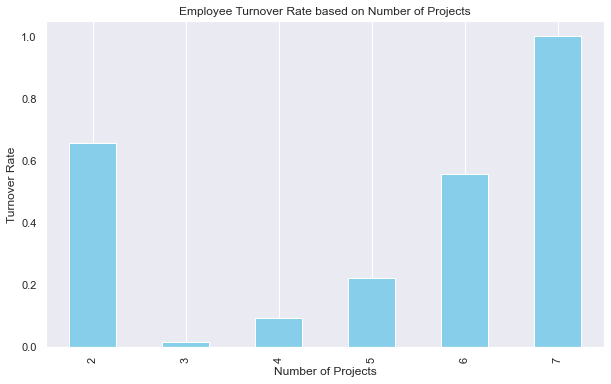

In [10]:
turnover_rate = df.groupby('number_project')['left'].mean()

# Plotting
plt.figure(figsize=(10, 6))
turnover_rate.plot(kind='bar', color='skyblue')
plt.title('Employee Turnover Rate based on Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Turnover Rate')
plt.grid(axis='y')
plt.show()

**Task 5:** Make a plot of your findings (only turn-over employees)

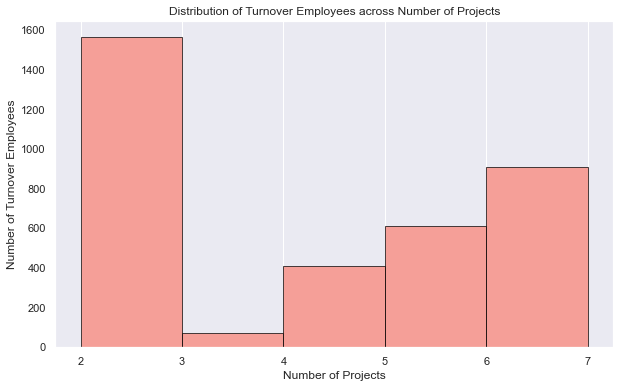

In [11]:
left_employees = df[df['left'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(left_employees['number_project'], bins=range(2, 8), color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribution of Turnover Employees across Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Turnover Employees')
plt.grid(axis='y')
plt.xticks(range(2, 8))
plt.show()

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: The graph illustrates the distribution of employees who left the company based on the number of projects they were involved in. From the histogram, it appears that a significant portion of employees who left had either a very low or a very high number of projects, with fewer employees leaving in the middle range.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

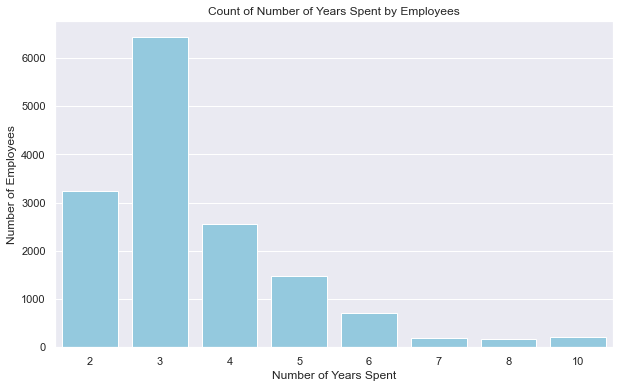

In [12]:
# Show the plot for the count of years here
count_per_year = df['time_spend_company'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=count_per_year.index, y=count_per_year.values, color='skyblue')
plt.title('Count of Number of Years Spent by Employees')
plt.xlabel('Number of Years Spent')
plt.ylabel('Number of Employees')
plt.show()


**Question: What is the maximum number of time spend by the employees?**

Answer: The maximum number of employees in the dataset have spent more than 2 years at the company, with a count of 3,100. Additionally, there are 600 employees who have spent more than 3 years, and 2,400 employees who have reached the 4-year mark. This distribution indicates a substantial portion of the workforce has been with the company for multiple years

In [13]:
# Write the code here to get the percentage of employees leaving.
percentage_leaving = (df['left'].sum() / len(df)) * 100

print(f"The percentage of employees leaving is: {percentage_leaving:.2f}%")


The percentage of employees leaving is: 23.81%


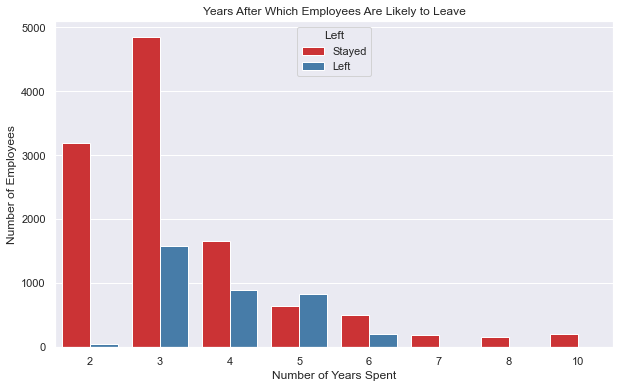

In [14]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
plt.figure(figsize=(10, 6))
sns.countplot(x='time_spend_company', hue='left', data=df, palette='Set1')
plt.title('Years After Which Employees Are Likely to Leave')
plt.xlabel('Number of Years Spent')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


**Question: After what time period are employees most likely to leave the company ?**

Answer: The bar plot indicates that there is a notable drop in the number of employees after the 3-year mark. This could be a critical period where employees might be evaluating their career trajectory

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

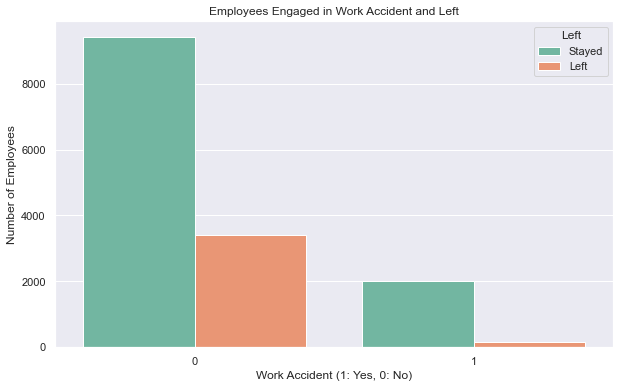

In [15]:
# Number of employees involved in work accident
plt.figure(figsize=(10, 6))
sns.countplot(x='Work_accident', hue='left', data=df, palette='Set2')
plt.title('Employees Engaged in Work Accident and Left')
plt.xlabel('Work Accident (1: Yes, 0: No)')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


**Question: What can you conclude from the graph above?**

Answer: From the graph above, it can be concluded that the majority of employees stayed (did not leave), while a smaller proportion left.

In [16]:
# Number of employees involved in work accident and left or not left
accident_left_counts = df.groupby(['Work_accident', 'left']).size().reset_index(name='Count')

# Print the result
print(accident_left_counts)


   Work_accident  left  Count
0              0     0   9428
1              0     1   3402
2              1     0   2000
3              1     1    169


## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [17]:
# Write code here
promotion_left_count = df[(df['promotion_last_5years'] == 1) & (df['left'] == 1)].shape[0]

print(f"Number of employees who got a promotion in the last 5 years and left: {promotion_left_count}")


Number of employees who got a promotion in the last 5 years and left: 19


Answer:  in the last 5 years, 19 employees who received a promotion have left the company.

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

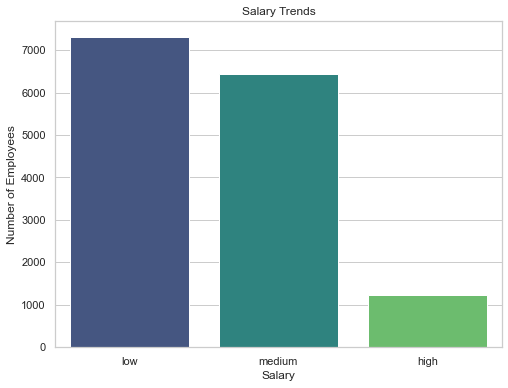

In [18]:
#Write code here
salary_counts = df['salary'].value_counts()

# Plotting the salary trends
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=salary_counts.index, y=salary_counts.values, palette="viridis")
plt.title('Salary Trends')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()


Answer: The salary trends in the dataset show that the majority of employees, around 7,000, have a low salary, followed by approximately 6,000 employees with a medium salary. A smaller proportion, around 1,000 employees, are receiving a high salary. This distribution suggests that the company has a significant number of employees in the lower and middle salary brackets, which could impact factors such as job satisfaction, employee retention, and overall workforce motivation

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [19]:
# Write code here
salary_leave_percentage = df.groupby('salary')['left'].mean() * 100




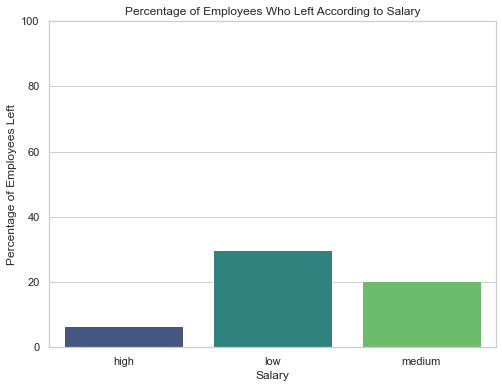

In [20]:
# Write code here for plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=salary_leave_percentage.index, y=salary_leave_percentage.values, palette="viridis")
plt.title('Percentage of Employees Who Left According to Salary')
plt.xlabel('Salary')
plt.ylabel('Percentage of Employees Left')
plt.ylim(0, 100)  # Set y-axis limit to ensure proper scale
plt.show()


**Question: What does the above plot show?**

Answer:Employees with low salaries are most likely to leave, followed by those with medium salaries. The data suggests that individuals receiving lower compensation are more prone to turnover, possibly due to factors such as job dissatisfaction, seeking better opportunities, or financial considerations. 

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [21]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
employees_per_department = df['dept'].value_counts()
employees_leaving_per_department = df[df['left'] == 1]['dept'].value_counts()
department_with_highest_leave = employees_leaving_per_department.idxmax()

# Print the results
print("Employees per department:")
print(employees_per_department)
print("\nDepartment with the highest number of employees leaving:")
print(department_with_highest_leave)

Employees per department:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

Department with the highest number of employees leaving:
sales


**Question: Which department has maximum number of employees?**

Answer: The sales department has the highest number of employees in the dataset.

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [22]:
# Write code here
turnover_percentage = (df[df['left'] == 1]['dept'].value_counts() / df['dept'].value_counts()) * 100



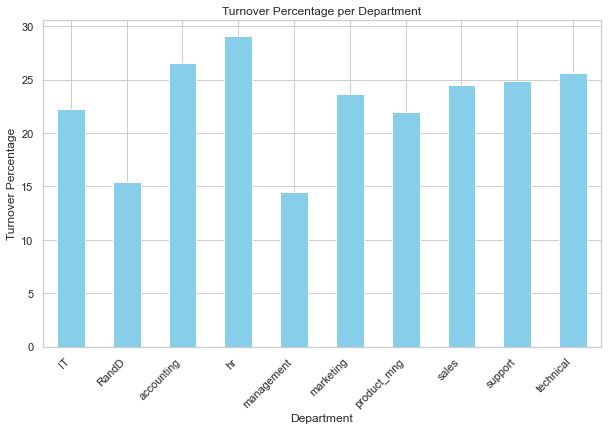

In [23]:
# Write code here to draw the plot
plt.figure(figsize=(10, 6))
turnover_percentage.plot(kind='bar', color='skyblue')
plt.title('Turnover Percentage per Department')
plt.xlabel('Department')
plt.ylabel('Turnover Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Answer: The IT and Accounting departments have the highest percentage of turnover.

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

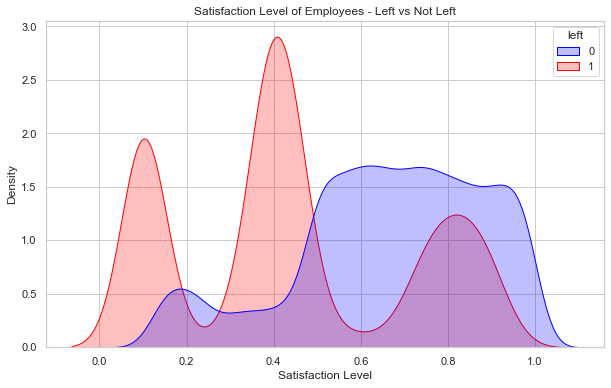

In [24]:
# Write the code here
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='satisfaction_level', hue='left', fill=True, common_norm=False, palette={0: 'blue', 1: 'red'})
plt.title('Satisfaction Level of Employees - Left vs Not Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.show()


**Question: What can you conclude from the plot above?**

Answer:his suggests that, on average, employees who left had a lower satisfaction level compared to those who remained with the company. A satisfaction level of 0.4 out of 1 indicates a significant dissatisfaction among the departing employees.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [25]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = np.where(df['satisfaction_level'] >= 0.5, 'High', 'Low')

# Display the DataFrame with the new feature
print(df)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

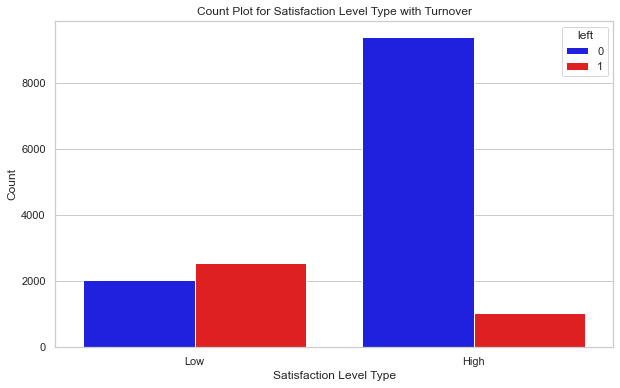

In [26]:
# Write Code Here
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_level_type', hue='left', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Count Plot for Satisfaction Level Type with Turnover')
plt.xlabel('Satisfaction Level Type')
plt.ylabel('Count')
plt.show()


Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

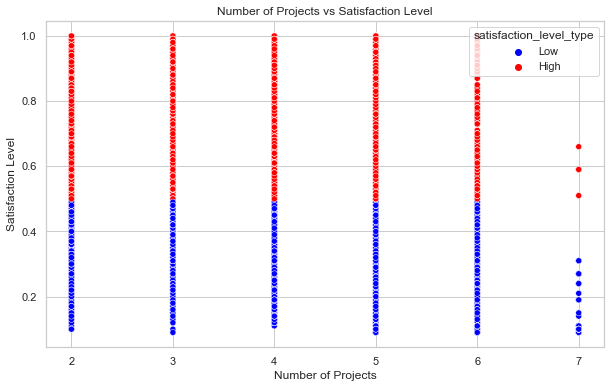

In [27]:
# Write Code Here
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_project', y='satisfaction_level', hue='satisfaction_level_type', data=df, palette={'Low': 'blue', 'High': 'red'})
plt.title('Number of Projects vs Satisfaction Level')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.show()


**Make a Plot of your findings**

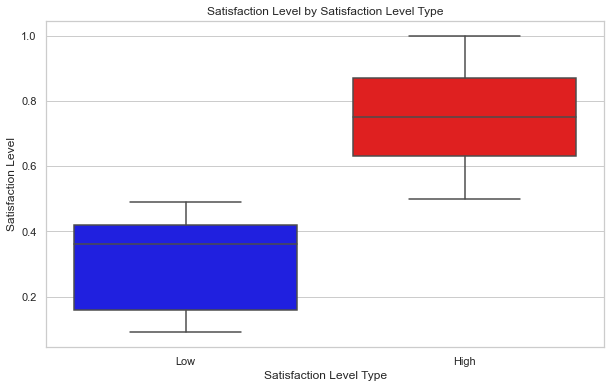

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction_level_type', y='satisfaction_level', data=df, palette={'Low': 'blue', 'High': 'red'})
plt.title('Satisfaction Level by Satisfaction Level Type')
plt.xlabel('Satisfaction Level Type')
plt.ylabel('Satisfaction Level')
plt.show()

**Question:** What did you infer drom the above plot

**Answer:** The boxplot illustrates the distribution of satisfaction levels categorized into "Low" and "High" satisfaction level types. From the plot, it can be inferred that employees with a "Low" satisfaction level generally have lower median satisfaction levels compared to those with a "High" satisfaction level

Now lets check number of projects for low satisfaction level

In [29]:
# Write Code Here
low_satisfaction_projects = df[df['satisfaction_level_type'] == 'Low']['number_project']

print("Number of Projects for Employees with Low Satisfaction Level:")
print(low_satisfaction_projects)


Number of Projects for Employees with Low Satisfaction Level:
0        2
2        7
4        2
5        2
6        6
        ..
14994    2
14995    2
14996    2
14997    6
14998    2
Name: number_project, Length: 4583, dtype: int64


Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [30]:
df['employee_type']= pd.cut(df['number_project'],
                             bins=[-float('inf'), 2, 5, float('inf')],
                             labels=['unburdened', 'Satisfactory', 'Burdened'],
                             right=False)

In [31]:
# Write code here
print(df[['number_project', 'employee_type']])



       number_project employee_type
0                   2  Satisfactory
1                   5      Burdened
2                   7      Burdened
3                   5      Burdened
4                   2  Satisfactory
...               ...           ...
14994               2  Satisfactory
14995               2  Satisfactory
14996               2  Satisfactory
14997               6      Burdened
14998               2  Satisfactory

[14999 rows x 2 columns]


**Task 15: Make a countplot to see which type of employee is leaving**

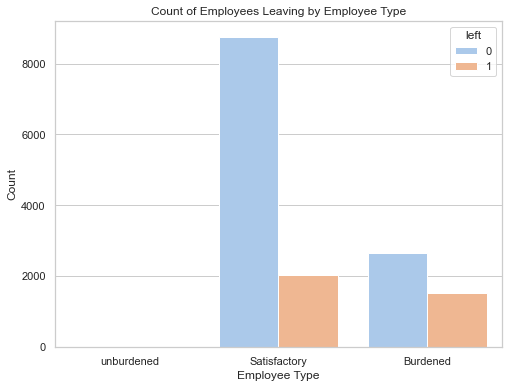

In [32]:
# Write code here
plt.figure(figsize=(8, 6))
sns.countplot(x='employee_type', hue='left', data=df, palette="pastel")
plt.title('Count of Employees Leaving by Employee Type')
plt.xlabel('Employee Type')
plt.ylabel('Count')
plt.show()


### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [33]:
# Write code here
redundant_columns = ['satisfaction_level']
df = df.drop(columns=redundant_columns)
print(df)


       last_evaluation  number_project  average_montly_hours  \
0                 0.53               2                   157   
1                 0.86               5                   262   
2                 0.88               7                   272   
3                 0.87               5                   223   
4                 0.52               2                   159   
...                ...             ...                   ...   
14994             0.57               2                   151   
14995             0.48               2                   160   
14996             0.53               2                   143   
14997             0.96               6                   280   
14998             0.52               2                   158   

       time_spend_company  Work_accident  left  promotion_last_5years  \
0                       3              0     1                      0   
1                       6              0     1                      0   
2           

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [34]:

categorical_columns = ['dept', 'salary', 'satisfaction_level_type', 'employee_type']

df = pd.get_dummies(df, columns=categorical_columns)


print(df)


       last_evaluation  number_project  average_montly_hours  \
0                 0.53               2                   157   
1                 0.86               5                   262   
2                 0.88               7                   272   
3                 0.87               5                   223   
4                 0.52               2                   159   
...                ...             ...                   ...   
14994             0.57               2                   151   
14995             0.48               2                   160   
14996             0.53               2                   143   
14997             0.96               6                   280   
14998             0.52               2                   158   

       time_spend_company  Work_accident  left  promotion_last_5years  \
0                       3              0     1                      0   
1                       6              0     1                      0   
2           

**Task 17: Creating Independant and Dependant Variables**

In [35]:
# Write code here
X=df.drop(columns=['left'])
Y=df['left']

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#Write code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)



In [38]:
print(X_train.shape, Y_train.shape)
print(X_test.shape,Y_test.shape)

(10499, 24) (10499,)
(4500, 24) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [39]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [40]:
# Making instance and training the model
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=100)

In [41]:
# Get predictions
rf_pred=rf_model.predict(X_test)

**Precision**

In [42]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score



In [43]:
#Write the code to calculate
rf_precion = precision_score(Y_test, rf_pred)
print(f"Precision for Random Forest: {rf_precion}")

Precision for Random Forest: 0.9770220588235294


**Accuracy**

In [44]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score


In [45]:
# Write the code to calculate
rf_acc = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc}")

Random Forest Accuracy: 0.9864444444444445


**Recall**

In [46]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score



In [47]:
# Write the code to calculate
rf_recall=recall_score(Y_test, rf_pred)
print(f"Recall for Random Forest: {rf_recall}")

Recall for Random Forest: 0.9672429481346679


**F1-Score**

In [48]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score


In [49]:
# Write the code to calculate
rf_f1_score = f1_score(Y_test, rf_pred)
print(f"F1-Score for Random Forest: {rf_f1_score}")

F1-Score for Random Forest: 0.9721079103795154


**Classification Report**

In [50]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report


In [51]:
#Write the code to calculate
rf_classification_report = classification_report(Y_test, rf_pred)
print("Classification Report for Random Forest:\n", rf_classification_report)


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.98      0.97      0.97      1099

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [52]:
# Import the model
from sklearn.linear_model import LogisticRegression



In [53]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=100)
lr_model.fit(X_train, Y_train)


C:\Users\ikhtisham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [54]:
# get the predictions
lr_pred=lr_model.predict(X_test)

**Accuracy**

In [55]:
#Write the code here
lr_accuracy = accuracy_score(Y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy}")


Logistic Regression Accuracy: 0.8544444444444445


**Precision**

In [56]:
#Write the code here
lr_precision = precision_score(Y_test, lr_pred)
print(f"Precision for Logistic Regression: {lr_precision}")

Precision for Logistic Regression: 0.718503937007874


**Recall**

In [57]:
#Write the code here
lr_recall = recall_score(Y_test, lr_pred)
print(f"Recall for Logistic Regression: {lr_recall}")

Recall for Logistic Regression: 0.6642402183803457


**F1 Score**

In [58]:
#Write the code here
lr_f1_score = f1_score(Y_test, lr_pred)
print(f"F1-Score for Logistic Regression: {lr_f1_score}")

F1-Score for Logistic Regression: 0.6903073286052008


**Classification Report**

In [59]:
#Write the code here
lr_classification_report = classification_report(Y_test, lr_pred)
print("Classification Report for Logistic Regression:\n", lr_classification_report)


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      3401
           1       0.72      0.66      0.69      1099

    accuracy                           0.85      4500
   macro avg       0.81      0.79      0.80      4500
weighted avg       0.85      0.85      0.85      4500



## Ada Boost

In [60]:
#Write the code here to import the model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [61]:
#Write the code here to make an instance and train the model with random state =100
ada_model = AdaBoostClassifier(random_state=100)
ada_model.fit(X_train, Y_train)
 

AdaBoostClassifier(random_state=100)

In [62]:
# Get the predictions
pred_clf_adb=ada_model.predict(X_test)

**Accuracy**

In [63]:
#Write code here
ab_accuracy = accuracy_score(Y_test,pred_clf_adb )
print(f"AdaBoost Accuracy: {ab_accuracy}")


AdaBoost Accuracy: 0.9311111111111111


**Precision**

In [64]:
#Write code here
ab_precision= precision_score(Y_test, pred_clf_adb)
print(f"Precision for AdaBoost: {ab_precision}")


Precision for AdaBoost: 0.8642659279778393


**Recall**

In [65]:
#Write code here
ab_recall= recall_score(Y_test, pred_clf_adb)
print(f"Recall for AdaBoost: {ab_recall}")


Recall for AdaBoost: 0.8516833484986351


**F1-Score**

In [66]:
#Write code here
ab_f1_score=f1_score(Y_test, pred_clf_adb)
print(f"F1-Score for AdaBoost: {ab_f1_score}")

F1-Score for AdaBoost: 0.8579285059578369


**Classification Report**

In [67]:
#Write code here
ada_classification_report = classification_report(Y_test, pred_clf_adb)
print("Classification Report for AdaBoost:\n", ada_classification_report)


Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.86      0.85      0.86      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.91      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [68]:
#Write the code here to import the model

!pip install xgboost


In [69]:
from xgboost import XGBClassifier

In [70]:
#Write the code here to make an instance and train the model with random state =100
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, Y_train)
 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [71]:
# Get the predictions
xgb_prediction = xgb_model.predict(X_test)

**Accuracy**

In [72]:
#Write code here
xgb_accuracy= accuracy_score(Y_test, xgb_prediction)
print(f"XGBoost Accuracy: {xgb_accuracy}")


XGBoost Accuracy: 0.9806666666666667


**Precision**

In [73]:
#Write code here
xgb_precision= precision_score(Y_test,xgb_prediction )
print(f"Precision for XGBBoost: {xgb_precision}")


Precision for XGBBoost: 0.9608378870673953


**Recall**

In [74]:
#Write code here
xgb_recall= recall_score(Y_test, xgb_prediction )
print(f"Recall for XGBBoost: {xgb_recall}")


Recall for XGBBoost: 0.9599636032757052


**F1-Score**

In [75]:
#Write code here
xgb_f1_score = f1_score(Y_test,xgb_prediction  )
print(f"F1-Score for XGBBoost: {xgb_f1_score}")

F1-Score for XGBBoost: 0.9604005461993628


**Classification Report**

In [76]:
#Write code here
xgb_classification_report = classification_report(Y_test,xgb_prediction)
print("Classification Report for XGBBoost Classification report:\n", xgb_classification_report)


Classification Report for XGBBoost Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.96      0.96      0.96      1099

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [77]:
# Write the code here
models = {
    'Random Forest': RandomForestClassifier(random_state=100),
    'Logistic Regression': LogisticRegression(random_state=100),
    'AdaBoost': AdaBoostClassifier(random_state=100),
    'XGBoost': XGBClassifier(random_state=100)
}


   


In [79]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Iterate through models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate scores
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    
    # Store results in the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }, ignore_index=True)

# Display the results DataFrame
print(results_df)

C:\Users\ikhtisham\AppData\Local\Temp\ipykernel_12948\745476551.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\ikhtisham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ikhtisham\AppData\Local\Temp\ipykernel_12948\745476551.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\U

                 Model  Accuracy Precision    Recall  F1-Score
0        Random Forest  0.986444  0.977022  0.967243  0.972108
1  Logistic Regression  0.854444  0.718504   0.66424  0.690307
2             AdaBoost  0.931111  0.864266  0.851683  0.857929
3              XGBoost  0.980667  0.960838  0.959964  0.960401


C:\Users\ikhtisham\AppData\Local\Temp\ipykernel_12948\745476551.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}


rf_model_tuned = RandomForestClassifier(random_state=100)


grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_


print("Best Parameters:", best_params)


tuned_rf_predictions = grid_search.predict(X_test)


tuned_rf_accuracy = accuracy_score(Y_test, tuned_rf_predictions)
tuned_rf_precision = precision_score(Y_test, tuned_rf_predictions)
tuned_rf_recall = recall_score(Y_test, tuned_rf_predictions)
tuned_rf_f1_score = f1_score(Y_test, tuned_rf_predictions)


print("Tuned Random Forest Scores:")
print(f"Accuracy: {tuned_rf_accuracy}")
print(f"Precision: {tuned_rf_precision}")
print(f"Recall: {tuned_rf_recall}")
print(f"F1-Score: {tuned_rf_f1_score}")

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Tuned Random Forest Scores:
Accuracy: 0.9864444444444445
Precision: 0.9770220588235294
Recall: 0.9672429481346679
F1-Score: 0.9721079103795154
